In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib as plt
import statistics as st
import numpy as np

To load the 'tips' dataset

In [4]:
tips_data = sns.load_dataset('tips')

tips_data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [5]:
tips_data.shape

(244, 7)

In [10]:
tips_data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## Descrptive Statistics

In [19]:
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [20]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Distribution

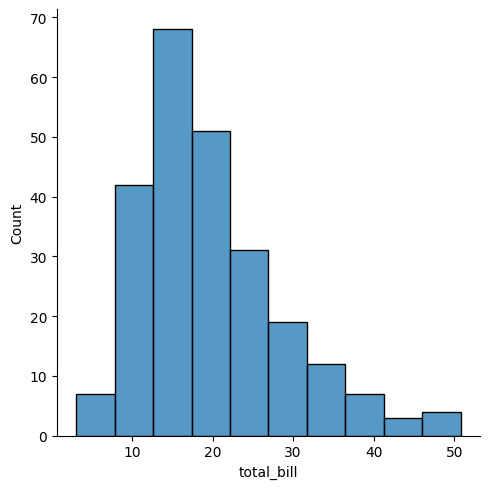

In [25]:
sns.displot(data=tips_data, x='total_bill', bins=10, kde=False)

In [29]:

tips_data.total_bill.mean()

19.78594262295082

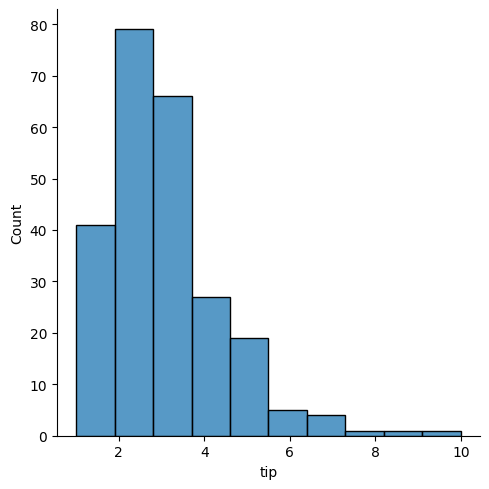

In [31]:
sns.displot(data=tips_data, x='tip', bins=10, kde=False)

In [32]:
tips_data.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


### Median use case

In [34]:
print('Mean: ', tips_data['tip'].mean())
print('Median: ', tips_data['tip'].median())

Mean:  2.99827868852459
Median:  2.9


#### Median is often a better replacement value than mean
When dealing with missing values in data analysis, using the median to replace them can often be more robust than using the mean. This is because the median represents the middle value of a dataset when it is sorted in ascending or descending order, whereas the mean is sensitive to outliers.

If a dataset contains outliers, the mean can be significantly influenced by these extreme values, leading to a skewed representation of the central tendency of the data. In such cases, the median provides a more stable estimate of the central value, as it is not affected by outliers.

Therefore, using the median to replace missing values can be a better choice in scenarios where outliers are present or when the data is not normally distributed. However, it's essential to consider the specific characteristics of the dataset and the context of the analysis when deciding whether to use the median or the mean for handling missing values.

In [39]:
tips_data_copy = tips_data.copy()

tips_data_copy

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Let's create an empty space somewhere

In [46]:
tips_data_copy['tip'][8] = np.nan

tips_data_copy.tip.head(10)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7048\3061340824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips_data_copy['tip'][8] = np.nan


0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
5    4.71
6    2.00
7    3.12
8     NaN
9    3.23
Name: tip, dtype: float64

In [49]:
tips_data_copy['tip'].fillna(tips_data_copy['tip'].median()).head(10)

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
5    4.71
6    2.00
7    3.12
8    2.92
9    3.23
Name: tip, dtype: float64

### Mean

In [56]:
list_of_age = [23, 12, 24, 21, 23, 14, 28, 26, 24, 25, 68]        # Age distribution

In [57]:
# Average Age distribution

np.mean(list_of_age)

26.181818181818183

In [58]:
st.mean(list_of_age)

26.181818181818183

### Mode
The most common value in a dataset

In [60]:
tips_data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


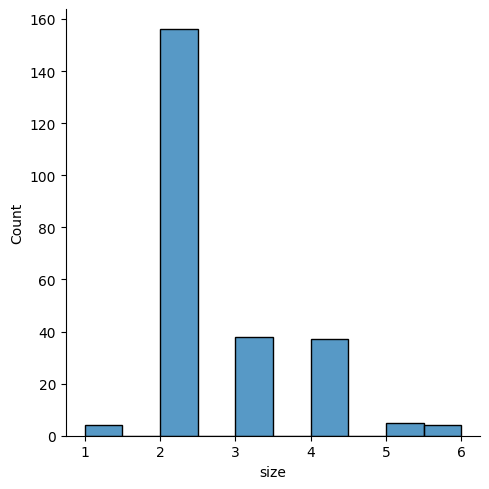

In [61]:
# let us examine the size in a visualization
sns.displot(data=tips_data, x='size', bins=10, kde=False)

In [62]:
tips_data['size'].mode()

0    2
Name: size, dtype: int64

### Standard Deviation
The shows the statistical measure   of the spread of a distribution.

In [68]:
# Let us create 2 lists with the same mean and later check their standard deviation.
list1 = [2,3,4,5,6]
list2 = [3,3,2,2,3,11]

# Mean
mean1 = np.mean(list1)
mean2 = np.mean(list2)

print('1st mean: ', mean1)
print('2nd mean: ', mean2)


1st mean:  4.0
2nd mean:  4.0


In [69]:
# Standard Deviation
stdev1 = np.std(list1)
stdev2 = np.std(list2)

print('1st standard dev: ', stdev1)
print('2nd standard dev: ', stdev2)

1st standard dev:  1.4142135623730951
2nd standard dev:  3.1622776601683795


The first standard deviation shows that the numbers are clustered around the mean.
While the 2nd shows that the numbers a not exactly close to the mean.

Lets see the tips dataset again

In [71]:
print('mean: ', tips_data['total_bill'].mean())
print('Standard Dev: ', tips_data['total_bill'].std())

mean:  19.78594262295082
Standard Dev:  8.902411954856856


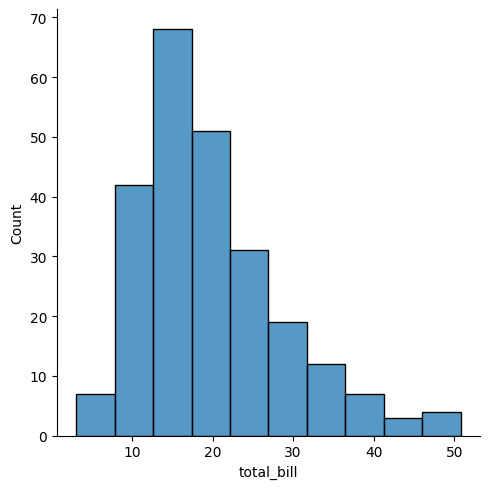

In [74]:
# let us examine the total_bill in a visualization
sns.displot(data=tips_data, x='total_bill', bins=10, kde=False)

In [72]:
print('mean: ', tips_data['tip'].mean())
print('Standard Dev: ', tips_data['tip'].std())

mean:  2.99827868852459
Standard Dev:  1.3836381890011822


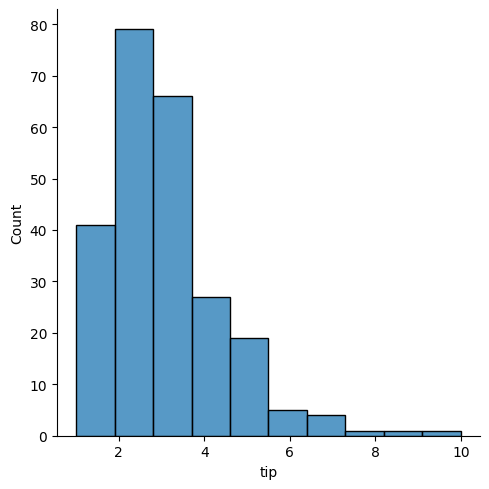

In [73]:
# let us examine the tip in a visualization
sns.displot(data=tips_data, x='tip', bins=10, kde=False)

### Inferential Statistics

In [79]:
tips_data_sample = tips_data.sample(frac=0.3, replace=True, random_state=1)

In [80]:
tips_data_sample.count()

total_bill    73
tip           73
sex           73
smoker        73
day           73
time          73
size          73
dtype: int64

In [81]:
tips_data_sample['total_bill'].mean()

19.248630136986304

In [82]:
tips_data_sample['total_bill'].std()

8.646551386257428

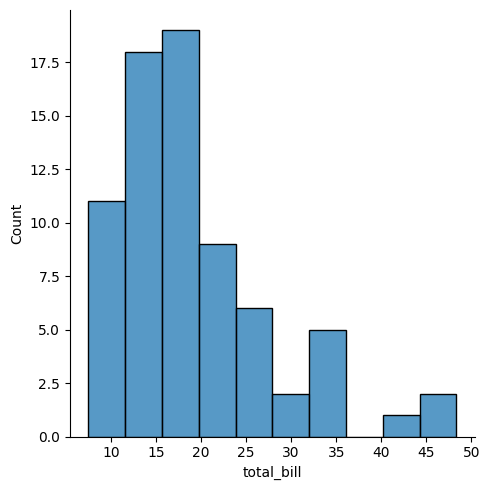

In [83]:
# let us examine the tip in a sample visualization
sns.displot(data=tips_data_sample, x='total_bill', bins=10, kde=False)